# PyCon Attendees Analysis

This notebook is a demostration of basic attendee analysis using pandas / seaborn.  
Some commands are useful only for exploratory purposes. marked as (expl.)

In [132]:
# Import modules with conventional abbreviation
# Short intro:
# Pandas: Dataframe manipulation (similar to R), (based on numpy)
# Seaborn: Data visualization tool, (based on matplotlib)
#   <--This allows the figures to show immediately.

In [133]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
% matplotlib inline

# This allows chinese characters to show up in figures. 
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

** Import data **

Store the csv file "2017Attendees.csv" under a sub-directory named "data" in the same directory as this notebook. 

In [134]:
df = pd.read_csv("./data/2017Attendees.csv")

** Check the columns and the data format. (expl.) **

In [135]:
df.head()

,Id,Order Number,Registration No.,Ticket Type,Payment Status,Tags,Paid Date,Price,# invoice policy #,Nationality / 國籍,Gender / 性別,服務公司(學生或老師請填學校名稱+系所) / Company(Students or teachers please fill in the school name + Department),"職稱(如果身分是學生請填”學生”) / Job Titles(If you are a student please fill in ""student"")","發票抬頭(購買 ""個人/企業一般票"" 才需要填寫) / Invoiced Company Name",Diet / 飲食,Size of T-shirt / T恤尺寸,Attendance Book
0,32244545,98014513,2,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,NaN,Taiwan 台灣,Male / 男性,Allion Labs Inc.,資深工程師,NaN,Vegetarian / 素食者,2XL / 胸寬(F.W.): 57cm / 衣長(C.L.): 73.5cm,NaN
1,32245217,98014912,3,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,NaN,Taiwan 台灣,Male / 男性,Positive Grid,Software Engineer,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN
2,32245244,98014932,4,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,NaN,Taiwan 台灣,Male / 男性,Positive Grid,Software Manager,NaN,Normal / 一般,S / 胸寬(F.W.): 47cm / 衣長(C.L.): 63.5cm,NaN
3,32245423,98015059,5,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,NaN,Taiwan 台灣,Male / 男性,臺灣師範大學資訊工程所,學生,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN
4,32245540,98015128,6,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,NaN,Taiwan 台灣,Male / 男性,BJES,SA,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN


In [136]:
# rename columns into English only. 
# inplace = True change the original dataframe.
df.rename(index=str, columns=
          {"Id": "ID", 
           "Gender / 性別": "Gender",
           "Nationality / 國籍": "Nationality",
           "服務公司(學生或老師請填學校名稱+系所) / Company(Students or teachers please fill in the school name + Department)":"Organization",
           "職稱(如果身分是學生請填”學生”) / Job Titles(If you are a student please fill in \"student\")":"Title",
           "Diet / 飲食":"Special food requirments",
           "Size of T-shirt / T恤尺寸":"Size",
           "發票抬頭(購買 \"個人/企業一般票\" 才需要填寫) / Invoiced Company Name":"Invoice Company name"}, inplace = True)

** Discard not useful columns **

In [137]:
# invoice policy is not useful for data analysis at this moment. Drop it. 
# This cell can only be run once (because once it is dropped, it is not there anymore...)
df.drop("# invoice policy #",axis = 1, inplace = True)

## Plotting categorical data

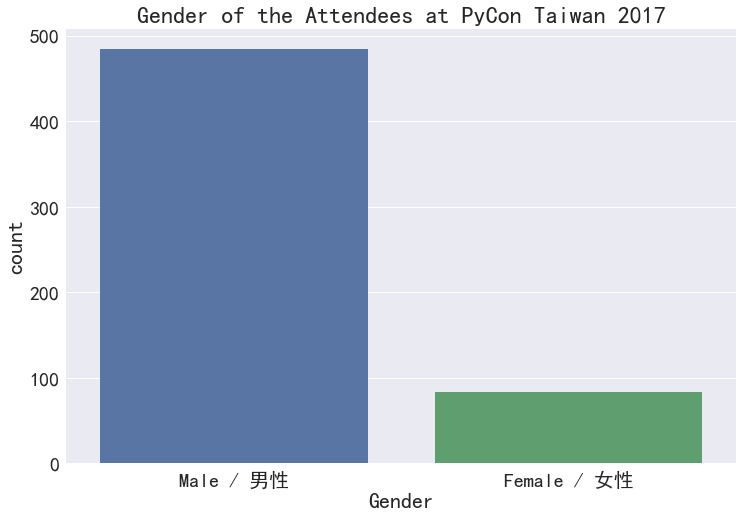

In [138]:
# Plot gender 
plt.subplots(figsize=(12,8))
plt.title('Gender of the Attendees at PyCon Taiwan 2017')
sns.countplot(x='Gender',data=df)

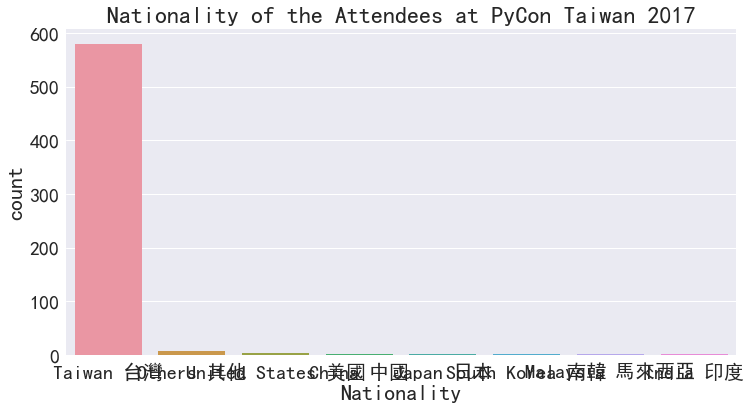

In [139]:
# plot nationalities
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.title('Nationality of the Attendees at PyCon Taiwan 2017')
sns.countplot(x='Nationality',data=df)

## Plot Job title -- 1. Exploration phase

Exploration: check how many organization and how many job titles are there

In [140]:
# Explore how many different organizations and job titles are there. Two different ways.
# 1. Convert to list. 

organ_list = df['Organization'].unique().tolist() 
title_list = df['Title'].unique().tolist()

# calculate the length of the lists.
organ_count = len(organ_list)
title_count = len(title_list)

# Print result
print("Organization count:",organ_count,
      "\nTitle count:",title_count)

Organization count: 483 
Title count: 218


In [141]:
# 2. Pandas can count value and return as a Series.
title_count = df['Title'].value_counts()
# check type
type(title_count)

pandas.core.series.Series

In [142]:
# Convert the series to dataframe. Add the column name.
title_count = title_count.to_frame(name = "Count").reset_index()

In [143]:
# Check the newly formed dataframe. 
# Note that the titles are regards as "index" in this dataframe.
title_count.head()

,index,Count
0,學生,108
1,工程師,58
2,Engineer,37
3,軟體工程師,20
4,Software Engineer,19


In [144]:
# Convert the Title column into a normal column and change the column name to 'Title"
title_count.reset_index()
title_count.columns.values[0] = 'Title'
title_count.head()

,Title,Count
0,學生,108
1,工程師,58
2,Engineer,37
3,軟體工程師,20
4,Software Engineer,19


In [145]:
# A way to call a subset of dataframe using condition:
title_count[title_count['Count'] > 4] 

,Title,Count
0,學生,108
1,工程師,58
2,Engineer,37
3,軟體工程師,20
4,Software Engineer,19
5,Student,11
6,研究助理,9
7,student,9
8,RD,9
9,Senior Engineer,8


** So far, **
we have explored the titles in the data format and have the conclusion that 
1. There are various input style for job titles, both English(cap/non-cap) and Mandrain Chinese. 
2. Out of 218 different job titles, there are only 17 exceed 5 counts...  

**Conclusion: ** We need to categorize these job title.

## Formulate Title Categories
Steps: 
1. define a function collect different categories
2. create a new column and acquire these data according to the title column
3. plot!

In [146]:
# 1. This function find a detailed job categories of what they do.
# Used a lot of regular expression. Check "Regex cheatsheet.ipynb" or related websites. 

def cat_title_detailed(title):
    title = str(title)
    pattern_engineer = "(?i)[engineer]{6,}|engr|developer|code|software\
    |工程師|碼|程式|資訊|program|軟體|設計|IT|Analysts|SW|AP|PG|F2E|DevOps" # 專員?
    pattern_developer = "(?i)develop|architect|^R.*D$|開發|AP"
    pattern_student = "學生|(?i)student"
    pattern_nobody = "(?i)無|0|沒有人|nobody|nan|自由業|none|self-employed"
    pattern_research = "(?i)phd|博|postdoc|research|研究"
    pattern_job_seek = "(?i)待業|Home|job|自由業|助理[^教授]|Freelance|self-employed"
    # 助理 could be a temporary job, but not 助理教授
    pattern_head = "(?i)C.O|chief|lead|chair|director|長|總|founder"
    pattern_professor = "(?i)PI|professor|教授"
    pattern_data_scientist = "(?i)data|資料|使用|經驗|分析|scientist"
    pattern_consultant = "(?i)consultant|顧問"
    pattern_manager = "(?i)manager|[^助]理|pm"
    pattern_graphics = "(?i)graph|art|cgi"
    pattern_dic = {'Engineer':pattern_engineer,'Consultant':pattern_consultant,
                   'Data Scientist':pattern_data_scientist, 'Developer':pattern_developer,
                   'Job Seeker':pattern_job_seek,'Head':pattern_head,'Professor': pattern_professor,
                  'Manager':pattern_manager, 'Graphics': pattern_graphics, 'Researcher':pattern_research,
                  'Student':pattern_student}
    title_cat = ''
    for pattern in pattern_dic:
        if re.search(pattern_dic[pattern], title) != None:
            title_cat = pattern
        else:
            pass
    return title_cat

In [147]:
# 2. apply function to dataframe
df['Title_Categories'] = df['Title'].apply(cat_title)
# show dataframe
df


,ID,Order Number,Registration No.,Ticket Type,Payment Status,Tags,Paid Date,Price,Nationality,Gender,Organization,Title,Invoice Company name,Special food requirments,Size,Attendance Book,Title_Categories
0,32244545,98014513,2,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,Allion Labs Inc.,資深工程師,NaN,Vegetarian / 素食者,2XL / 胸寬(F.W.): 57cm / 衣長(C.L.): 73.5cm,NaN,Engineer
1,32245217,98014912,3,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,Positive Grid,Software Engineer,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN,Engineer
2,32245244,98014932,4,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,Positive Grid,Software Manager,NaN,Normal / 一般,S / 胸寬(F.W.): 47cm / 衣長(C.L.): 63.5cm,NaN,Manager
3,32245423,98015059,5,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,臺灣師範大學資訊工程所,學生,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN,Student
4,32245540,98015128,6,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,BJES,SA,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN,
5,32245569,98015152,7,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,Sharelike,Developer,NaN,Normal / 一般,L / 胸寬(F.W.): 52cm / 衣長(C.L.): 68.5cm,NaN,Developer
6,32245570,98015153,9,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,"Institute of Astronomy and Astrophysics, Acade...",Postdoc,NaN,Normal / 一般,XL / 胸寬(F.W.): 54.5cm / 衣長(C.L.): 71cm,NaN,Researcher
7,32245576,98015158,10,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,Linker Networks Inc.,Data Engineer,NaN,Normal / 一般,M / 胸寬(F.W.): 49.5cm / 衣長(C.L.): 66cm,NaN,Data Scientist
8,32245579,98015161,12,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Female / 女性,臺北市立聯合醫院,主治醫師,NaN,Normal / 一般,XS / 胸寬(F.W.): 44.5cm / 衣長(C.L.): 62cm,NaN,
9,32245586,98015167,13,[ Early Bird ] Discount [ 早鳥 ] 個人優惠票,paid,NaN,2017-04-17,2500,Taiwan 台灣,Male / 男性,家裡蹲,工程師,NaN,Normal / 一般,S / 胸寬(F.W.): 47cm / 衣長(C.L.): 63.5cm,NaN,Engineer


In [148]:
pattern_nobody = "(?i)無|0|沒有人|nobody|nan|自由業|none|self-employed"

pattern = '家|自'

# df2 =pd.DataFrame( {'A':[1,2,3],
#      'B':[4,5,6],'C':[7,8,9]})
# df3 = df2[['A','B']]
# df3

# Without a job: See from Organization

# Nan: 32,71,101,104,325,569
# none: 194, 274, 276,301,375,426, 498
# 不告訴你： 9,263,560
# 家裡個人接案：435,436,465,
# 560 : 表情符號...

# 488是駭客！

df[['Organization','Title']].iloc[9]


Organization    家裡蹲
Title           工程師
Name: 9, dtype: object

In [149]:
# Count each categories:
# Empty = Uncategorized
df['Title_Categories'].value_counts()

Engineer          267
Student           130
Developer          44
                   37
Manager            29
Data Scientist     27
Researcher         27
Head               19
Professor           9
Job Seeker          5
Consultant          4
Graphics            1
Name: Title_Categories, dtype: int64

In [151]:
### Apply "Others" text to these rows in the column "Title_Categoreis".
# Define function
def apply_others(x):
    if x == '':
        return 'Others'

# Fill in the value
others = df[df['Title_Categories'] =='']['Title_Categories'].apply(apply_others)

# Update the original df
df['Title_Categories'].update(others)


In [ ]:
# Show df
df

### 3. Plot title categories

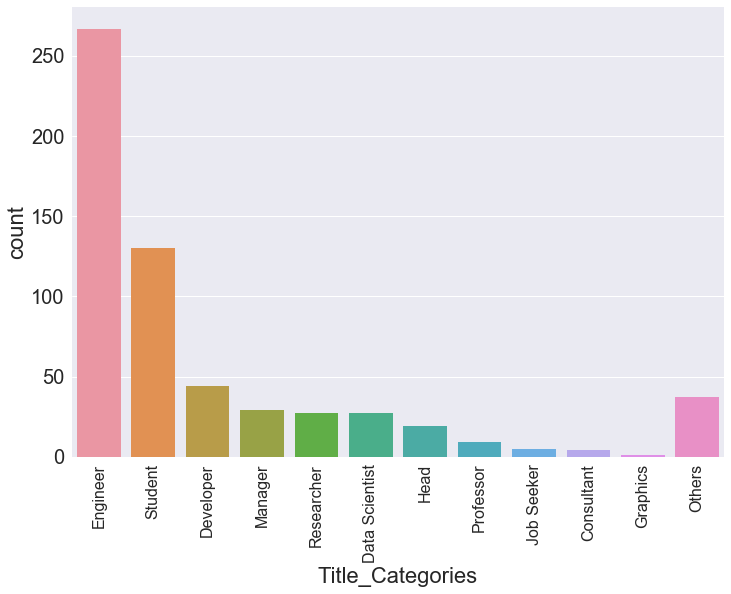

In [153]:
###Challenge 2: Switch the "Others" column to the last bin. The numbers has to be correct.###
### NOW it it disrupted
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_xticklabels('1_Title',rotation=90,fontdict= {"fontsize": '16'})
ax.set_xlabel(xlabel="Job Title")
ax.set_ylabel(ylabel= "Counts")
sns.set(font_scale = 2)

sns.countplot(x = 'Title_Categories', data = df, ax = ax, 
              order = ['Engineer', 'Student', 'Developer', 'Manager', 'Researcher',
       'Data Scientist', 'Head', 'Professor', 'Job Seeker', 'Consultant',
       'Graphics','Others'])

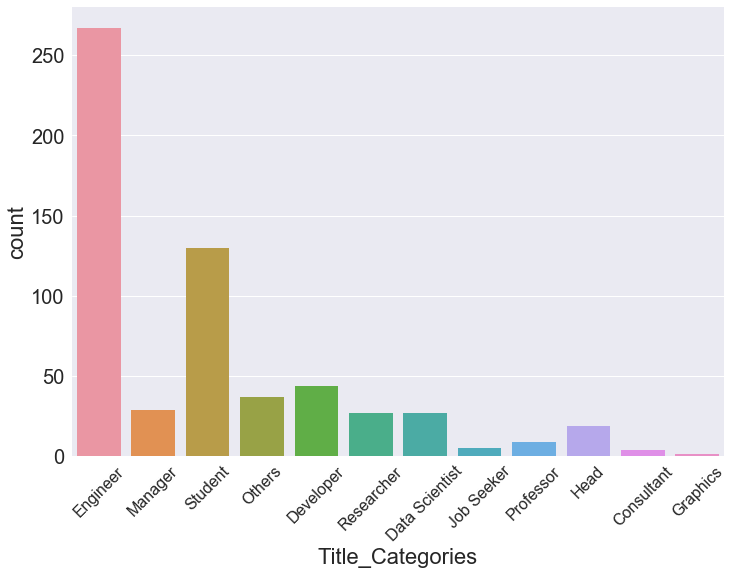

In [154]:
# Form a new dataframe
title_cat_count = pd.DataFrame([df["Title_Categories"],df[""])


fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax.set_xticklabels('1_Title',rotation=45,fontdict= {"fontsize": '16'})
ax.set_xlabel(xlabel="Job Title")
ax.set_ylabel(ylabel= "Counts")
sns.set(font_scale = 2)

sns.barplot(x = '1_Title', y = "2_Counts", data = title_cat_counts, ax = ax)